<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/ruido_ext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Ruido extrínseco

Autor: Biología de sistemas

Fecha: 7 de diciembre del 2020

Cargar librerías

In [2]:
install.packages("deSolve")
library(deSolve)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Establecer el modelo

In [12]:
cocos <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    dx <- kp - kd*x

    return(list(dx))
  })
}

Declarar los valores nominales (ej: output de optimización paramétrica)

In [24]:
# parámetros
kp_nom <- 5
kd_nom <- 7

# condiciones iniciales
x0_nom <- c(x = 1)

Definir el intervalo de integración

In [25]:
time <- seq(from = 0, to = 10, by = 0.01)

Establecer valor de parámetros

In [26]:
p <- c(kp = kp_nom, kd = kd_nom)

Resolver el modelo y graficar el cambio de la variable en el tiempo

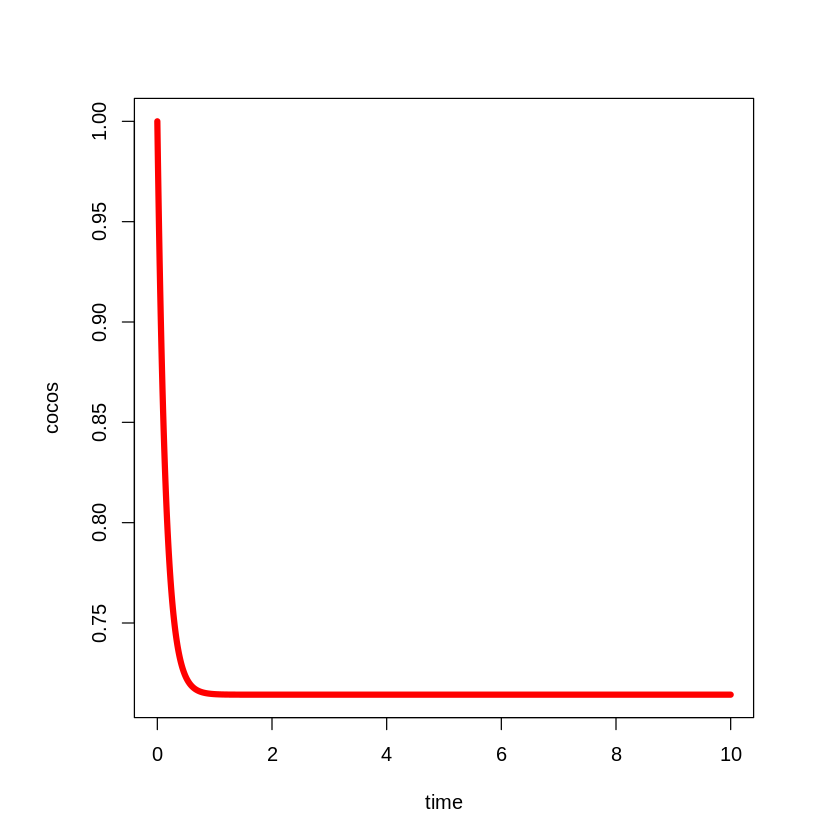

In [27]:
out_nom <- ode(y = x0_nom, times = time, func = cocos, parms = p)
par(pty = "s")
plot(out[,1],out[,2], col = "red", type = "l", lwd = 5, ylab = "cocos", xlab = "time")

Definir el número de iteraciones


In [19]:
iterations <- 50

Generar matriz para guardar los resultados de las simulaciones

In [20]:
x_family <- matrix(data = NA, nrow = length(time), ncol = iterations)

Llenar la matriz variando los valores nominales con una distribución normal 

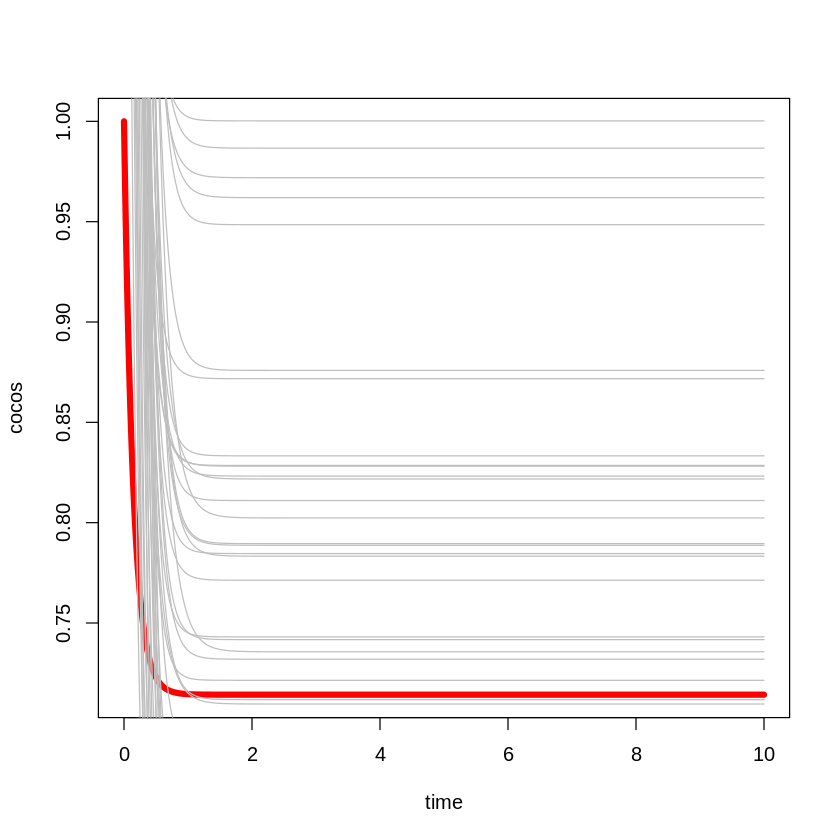

In [28]:
plot(out_nom[,1],out_nom[,2], col = "red", type = "l", lwd = 5, ylab = "cocos", xlab = "time")
for (i in 1:iterations) {
  # muestrea parámetros
  p["kp"] <- rnorm(1, mean = kp_nom, sd = 1)
  p["kd"] <- rnorm(1, mean = kd_nom, sd = 1)
  x0_nom <- rnorm(1, mean = x0_nom, sd = 1)
  names(x0_nom) <- "x"

  # invocar al integrador
  out <- ode(y = x0_nom, times = time, func = cocos, parms = p)
  x_family[,i] = out[,2]

  # graficar nuevas curvas
  lines(out[,1], out[,2], col = "grey", type = "l", lwd = 1)
}

Graficar la distribución de valores finales

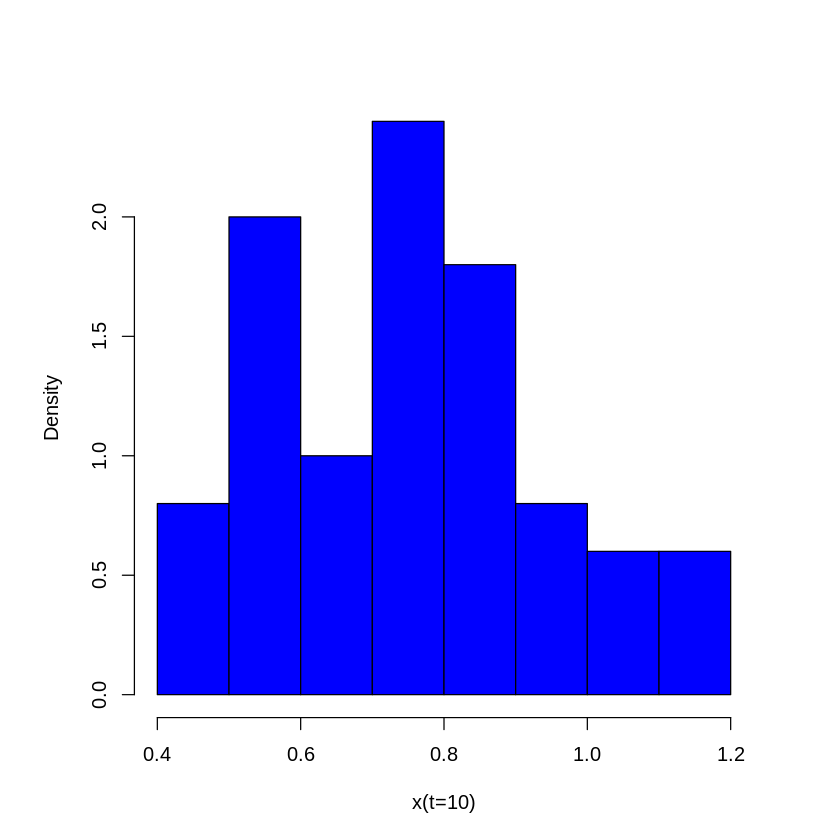

In [30]:
par(pty="s")
hist(x_family[1001,], freq=FALSE, col="blue", main=" ", xlab="x(t=10)")
points(kp_nom/kd_nom, 3)